<a href="https://colab.research.google.com/github/SeokHyeon-Hwang/programmerspython/blob/master/class01_lasso(hwang).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
def load_extended_boston():
   boston = load_boston() # 데이터 셋 불러오기
   X = boston.data # 입력 데이터

   X = MinMaxScaler().fit_transform(boston.data) # 입력 데이터 정규화
   X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
   return X, boston.target

In [0]:
X, y = load_extended_boston()
print(X.shape, y.shape)

(506, 104) (506,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("검증 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.94
검증 데이터 세트 점수 : 0.78


In [0]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("검증 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : {:.2f}".format(np.sum(lasso.coef_ != 0)))

훈련 데이터 세트 점수 : 0.27
검증 데이터 세트 점 : 0.26
사용한 특성의 수 : 3.00


In [0]:
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("검증 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : {:.2f}".format(np.sum(lasso.coef_ != 0)))

훈련 데이터 세트 점수 : 0.89
검증 데이터 세트 점수 : 0.80
사용한 특성의 수 : 34.00


In [0]:
import matplotlib.pyplot as plt

# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)
%matplotlib inline

FileNotFoundError: ignored

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


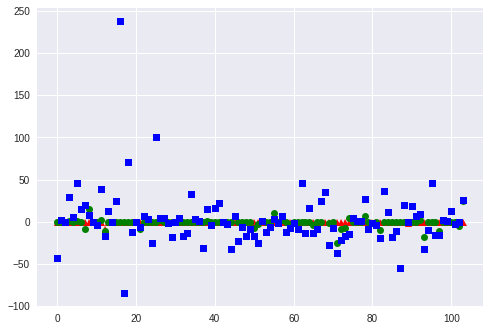

In [0]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(lasso.coef_, "r^", label="Lasso alpha=1")
plt.plot(lasso001.coef_, 'go', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "bs", label="Lasso alpha=0.0001")


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


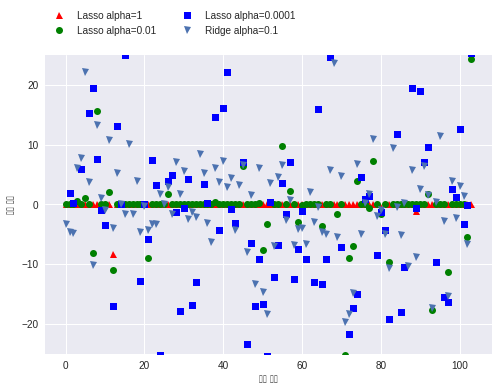

In [0]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(lasso.coef_, "r^", label="Lasso alpha=1")
plt.plot(lasso001.coef_, 'go', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "bs", label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()
